In [1]:
import pandas as pd, numpy as np
import os, sys, pytz, h5py
from datetime import datetime, date, time
from scipy.signal import medfilt
from matplotlib import pyplot as plt
def convert_time_to_timezones(time_secs,timezone):
    time_in_nano = time_secs
    utc_time = datetime.utcfromtimestamp(time_in_nano // 1000000000)
    print("Pointer 1 - Task 1 solution - ")
    print("UTC Time = ", utc_time)
    cern_timezone = pytz.timezone('Europe/Zurich')
    print("Pointer 1 - Task 2 solution - ")
    print("Time Zone = ",cern_timezone.zone)
    print("Time in Zone ",cern_timezone.zone," is ",pytz.utc.localize(utc_time).astimezone(cern_timezone))
    
print("---------- POINTER 1 SOLUTION ----------")
convert_time_to_timezones(154196210893500000,"cern")

---------- POINTER 1 SOLUTION ----------
Pointer 1 - Task 1 solution - 
UTC Time =  1974-11-20 16:16:50
Pointer 1 - Task 2 solution - 
Time Zone =  Europe/Zurich
Time in Zone  Europe/Zurich  is  1974-11-20 17:16:50+01:00


In [11]:
def get_h5_file(filename):
    f = filename
    data_dict = {}
    
    def explore_hdf(element,point):
        if(isinstance(point,h5py.Dataset)):
            try:
                datatype = point.dtype
            except Exception as e:
                datatype = str(e)
            data_dict[element] = ['dataset', point.size, point.shape, datatype]
        elif(isinstance(point,h5py.Group)):
            data_dict[element] = ['group','','','']
        else:
            datatype = point.dtype
            data_dict[element] = ['Others Type','','',datatype]
            
    print("Get the files from HDF file format")
    f.visititems(explore_hdf)
    
    print('Coverting it to regular pandas dataframe')
    df = pd.DataFrame.from_dict(data_dict,
                                orient = 'index',
                                columns = ['element_type','size','shape','data_type']) 
    df.to_csv('data.csv',sep=',')
    return df


print("---------- POINTER 2 SOLUTION ----------")

file = h5py.File('1541962108935000000_167_838.h5','r')
df = get_h5_file(file)
df.head()

---------- POINTER 2 SOLUTION ----------
Get the files from HDF file format
Coverting it to regular pandas dataframe


,element_type,size,shape,data_type
AwakeEventData,group,,,
AwakeEventData/AIRTR01,group,,,
AwakeEventData/AIRTR01/Acq,group,,,
AwakeEventData/AIRTR01/Acq/numericPosition,dataset,1,"(1,)",float32
AwakeEventData/AIRTR02,group,,,


In [12]:
df[df['element_type']=='Others Type']

,element_type,size,shape,data_type
__DATA_TYPES__/Enum_Boolean,Unknown Type,,,bool
__DATA_TYPES__/String_VariableLength,Unknown Type,,,object


In [19]:
data_path = "/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData"
height_path = "/AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight"
width_path = "/AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth" 
image_data = file[data_path][:]
image_height_data = file[height_path][0]
image_width_data = file[width_path][0]
image_data.shape, image_height_data.shape, image_width_data.shape

((344064,), (), ())

In [20]:
image_width_data

672

In [21]:
image_height_data

512

Streak saved as png


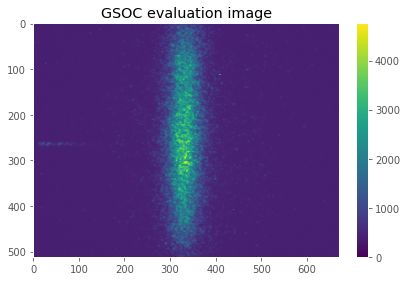

In [40]:
image_final_data = np.reshape(image_data,(image_height_data,image_width_data))
filtered_image = medfilt(image_final_data)
fig = plt.figure(figsize=(np.ceil(image_height_data/100),np.ceil(image_width_data/100)))
plt.imshow(filtered_image)
ax = plt.subplot()
plt.title("GSOC evaluation image")
plt.colorbar(fraction = 0.035)
ax.grid(False)
plt.savefig('gsoc_evaluation_Image.png')
print('The image is saved as a png - please look up the name gsoc_evaluation_Image.png in the same directory')

---------- POINTER 3 SOLUTION ----------


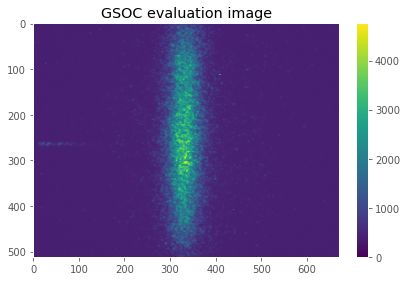

The image is saved as a png - please look up the name gsoc_evaluation_Image.png in the same directory


<Figure size 432x288 with 0 Axes>

In [42]:
def create_image(path_list):
    path_l = path_list
    image_data = file[path_l[0]][:]
    image_height_data = file[path_l[1]][0]
    image_width_data = file[path_l[2]][0]
    
    image_final_data = np.reshape(image_data,(image_height_data,image_width_data))
    filtered_image = medfilt(image_final_data)
    
    fig = plt.figure(figsize=(np.ceil(image_height_data/100),np.ceil(image_width_data/100)))
    
    ax = plt.subplot()
    plt.imshow(filtered_image)
    plt.title("GSOC evaluation image")
    plt.colorbar(fraction = 0.035)
    ax.grid(False)
    plt.show()
    plt.savefig('gsoc_evaluation_Image.png')
    print('The image is saved as a png - please look up the name gsoc_evaluation_Image.png in the same directory')
    
print("---------- POINTER 3 SOLUTION ----------")
path_list = [data_path, height_path, width_path]
create_image(path_list)